# Assignment 6
Done by:
- Saumili Jana: 20ME10075
- Ushasi Das: 20EC10086
- Jaya Kishnani: 20EC30020
- Karthikeyan.R: 20EC30024

In [531]:
#importing modules
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [532]:
#importing the dataset
all_data = pd.read_csv('Twitter_data.csv')
all_data= all_data.dropna()
print(all_data)

                   TweetID       Day   Hour  Lang  IsReshare    Reach  \
0    tw-682712873332805633  Thursday   17.0    en      False     44.0   
1    tw-682713045357998080  Thursday   17.0    en       True   1810.0   
2    tw-682713219375476736  Thursday   17.0    en      False    282.0   
3    tw-682713436967579648  Thursday   17.0    en      False   2087.0   
4    tw-682714048199311366  Thursday   17.0    en      False    953.0   
..                     ...       ...    ...   ...        ...      ...   
994  tw-683738642334892032    Sunday   12.0    en      False     22.0   
995  tw-683739639107203073    Sunday   13.0    en      False     70.0   
996  tw-683739842673520640    Sunday   13.0    en      False  17422.0   
997  tw-683740297575051265    Sunday   13.0    en      False    710.0   
998  tw-683741220896641025    Sunday   13.0    en       True   1691.0   

      RetweetCount   Likes   Sentiment  \
0              0.0     0.0         0.0   
1              5.0     0.0         2.0 

/Users/drniharranjanjana/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,3,4,9,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [533]:
all_data

,TweetID,Day,Hour,Lang,IsReshare,Reach,RetweetCount,Likes,Sentiment,text,LocationID,UserID
0,tw-682712873332805633,Thursday,17.0,en,False,44.0,0.0,0.0,0.0,We are hiring: Senior Software Engineer - Prot...,3751.0,tw-40932430
1,tw-682713045357998080,Thursday,17.0,en,True,1810.0,5.0,0.0,2.0,RT @CodeMineStatus: This is true Amazon Web Se...,3989.0,tw-3179389829
2,tw-682713219375476736,Thursday,17.0,en,False,282.0,0.0,0.0,0.0,Devops Engineer Aws Ansible Cassandra Mysql Ub...,3741.0,tw-4624808414
3,tw-682713436967579648,Thursday,17.0,en,False,2087.0,4.0,0.0,0.0,Happy New Year to all those AWS instances of o...,3753.0,tw-356447127
4,tw-682714048199311366,Thursday,17.0,en,False,953.0,0.0,0.0,0.0,Amazon is hiring! #Sr. #International Tax Mana...,3751.0,tw-3172686669
...,...,...,...,...,...,...,...,...,...,...,...,...
994,tw-683738642334892032,Sunday,12.0,en,False,22.0,0.0,0.0,2.0,@pseudocode It allows for: @SassCSS file revis...,3874.0,tw-964383511
995,tw-683739639107203073,Sunday,13.0,en,False,70.0,0.0,0.0,0.0,We are hiring: Amazon S3 Software Development ...,3751.0,tw-289094642
996,tw-683739842673520640,Sunday,13.0,en,False,17422.0,0.0,0.0,0.0,Ace the Amazon Web Services Certification Exam...,82.0,tw-22445925
997,tw-683740297575051265,Sunday,13.0,en,False,710.0,0.0,0.0,0.0,@shfitriah aws .. English stfu,1885.0,tw-552022479


In [498]:
print(all_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 998
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TweetID        997 non-null    object 
 1   Day            997 non-null    object 
 2    Hour          997 non-null    float64
 3    Lang          997 non-null    object 
 4    IsReshare     997 non-null    object 
 5    Reach         997 non-null    float64
 6    RetweetCount  997 non-null    float64
 7    Likes         997 non-null    float64
 8    Sentiment     997 non-null    float64
 9    text          997 non-null    object 
 10   LocationID    997 non-null    float64
 11   UserID        997 non-null    object 
dtypes: float64(6), object(6)
memory usage: 101.3+ KB
None


In [499]:
#extracting the columns Day and IsReshare
Day = all_data['Day']
Day = Day.values.tolist()
Reshare = all_data[' IsReshare']
Reshare = Reshare.values.tolist()
Reshare

[False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True

In [500]:
#converting Day to categorical Integer
i = 0
for x in Day:
    if x == 'Thursday':
        Day[i] = 0
    elif x == 'Friday':
        Day[i] = 1
    elif x == 'Saturday':
        Day[i] = 2
    elif x == 'Sunday':
        Day[i] = 3
    i= i+1
#print(Day)

#converting IsReshare to categorical integer from boolean
i = 0
for x in Reshare:
    if x == True:
        Reshare[i] = 1
    elif x == False:
        Reshare[i] = 0
    i = i+1
#print(Reshare)

In [501]:
#Dropping the unnecessary columns
all_data = all_data.drop(['TweetID', ' Lang', ' text', ' UserID', 'Day', ' IsReshare', ' LocationID'], axis = 1)#dropping unnecessary columns
all_data 

,Hour,Reach,RetweetCount,Likes,Sentiment
0,17.0,44.0,0.0,0.0,0.0
1,17.0,1810.0,5.0,0.0,2.0
2,17.0,282.0,0.0,0.0,0.0
3,17.0,2087.0,4.0,0.0,0.0
4,17.0,953.0,0.0,0.0,0.0
...,...,...,...,...,...
994,12.0,22.0,0.0,0.0,2.0
995,13.0,70.0,0.0,0.0,0.0
996,13.0,17422.0,0.0,0.0,0.0
997,13.0,710.0,0.0,0.0,0.0


In [502]:
#recombining columns with data
all_data['IsReshare']= Reshare
all_data['Day']= Day #the last column is day, it would not be used for clustering
all_data

,Hour,Reach,RetweetCount,Likes,Sentiment,IsReshare,Day
0,17.0,44.0,0.0,0.0,0.0,0,0
1,17.0,1810.0,5.0,0.0,2.0,1,0
2,17.0,282.0,0.0,0.0,0.0,0,0
3,17.0,2087.0,4.0,0.0,0.0,0,0
4,17.0,953.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...
994,12.0,22.0,0.0,0.0,2.0,0,3
995,13.0,70.0,0.0,0.0,0.0,0,3
996,13.0,17422.0,0.0,0.0,0.0,0,3
997,13.0,710.0,0.0,0.0,0.0,0,3


### Plotting dendrogram

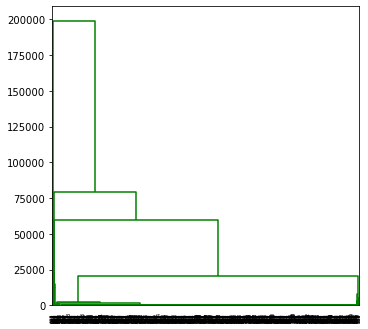

In [503]:
from scipy.cluster import hierarchy
data = hierarchy.linkage(all_data, 'single')
plt.rcParams["figure.figsize"] = [5.50, 5.50]
plt.figure()
dn = hierarchy.dendrogram(data, above_threshold_color="green", color_threshold=.7)



# HAC from scratch


In [504]:
# Function to Find Euclidean Distance
def euclid(point1, point2):
    p = 2
    point1 = point1[:-1] #ignore the last column i.e days while classification 
    point2 = point2[:-1]
    a = np.subtract(point1,point2) 
    a = np.absolute(a)
    a = np.power(a, p)
    s = np.sum(a)
    dist = s**(1/p)
    return(dist)

In [505]:
dataset = all_data.to_numpy() #converting to numpy array for ease of computation
print(dataset)
(row, col) = np.shape(dataset)

[[1.7000e+01 4.4000e+01 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.7000e+01 1.8100e+03 5.0000e+00 ... 2.0000e+00 1.0000e+00 0.0000e+00]
 [1.7000e+01 2.8200e+02 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [1.3000e+01 1.7422e+04 0.0000e+00 ... 0.0000e+00 0.0000e+00 3.0000e+00]
 [1.3000e+01 7.1000e+02 0.0000e+00 ... 0.0000e+00 0.0000e+00 3.0000e+00]
 [1.3000e+01 1.6910e+03 1.0300e+02 ... 0.0000e+00 1.0000e+00 3.0000e+00]]


In [506]:
# rescaling columns
def normalise(array):
    k = 0
    while(k<col-1):     #ignore days column
        ar = array[:,k]
        #print(ar)
        #print(np.max(ar))
        array[:,k] = ((ar-np.min(ar))/(np.max(ar)-np.min(ar)))*100
        k = k+1
    return(array)
dataset = normalise(dataset)
#print(dataset[0])

In [507]:
# function to pick distance between 2 clusters: Single link
def dmin(cluster1, cluster2):
    dist = []
    for point1 in cluster1:
        for point2 in cluster2:
            d = euclid(point1,point2)
            dist.append(d)
    dist.sort()
    return(dist[0])

In [508]:
#function to pick minimum distance between 2 clusters: complete link
def dmax(cluster1, cluster2):
    dist = []
    for point1 in cluster1:
        for point2 in cluster2:
            d = euclid(point1,point2)
            dist.append(d)
    dist.sort()
    return(dist[-1])


## 1. Single link HAC

In [509]:
#Initialise: Each element is a separate cluster
cluster = [] #list of all clusters
for x in dataset:
    x_ = np.array([x])
    cluster.append(x_)

k = cluster[0]
len(cluster)

997

In [510]:
#Clustering by HAC

while(len(cluster)>4): #continue until the no of clusters = 4
    x = cluster.pop(0) #delete the 1st element from the cluster list and store it in x 
    i = 0
    min_d = None      # to store the minimum distance between 2 clusters
    for y in cluster: #find the cluster whose distance from x is the least
        d = dmin(x,y) #single link clustering

        if min_d is None:
            min_d = d
            ind = i  
        elif d<min_d:
            min_d = d
            ind = i   #get the index of the cluster closest to x
        i = i+1
    clus = cluster.pop(ind)#delete the closest cluster to x from the list and store in y
    f = np.vstack((x, clus)) #merge x and y to obtain 1 cluster
    cluster.append(f) #add the new cluster to the list


print('The number of clusters formed = ',len(cluster))

The number of clusters formed =  4


In [511]:
print(len(cluster[0]))
print(len(cluster[1]))
print(len(cluster[2]))
print(len(cluster[3]))

158
128
392
319


### Plotting the clusters

In [512]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [513]:
i = 0
pc1 = []
pc2 = []
while (i<4):
    cl = cluster[i]
    clus = StandardScaler().fit_transform(cl[:,:-1]) #ignore days column
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(clus)
    pc11 = principalComponents[:, 0]
    pc1.append(pc11)
    pc12 = principalComponents[:, 1]
    pc2.append(pc12)
    
    i = i+1

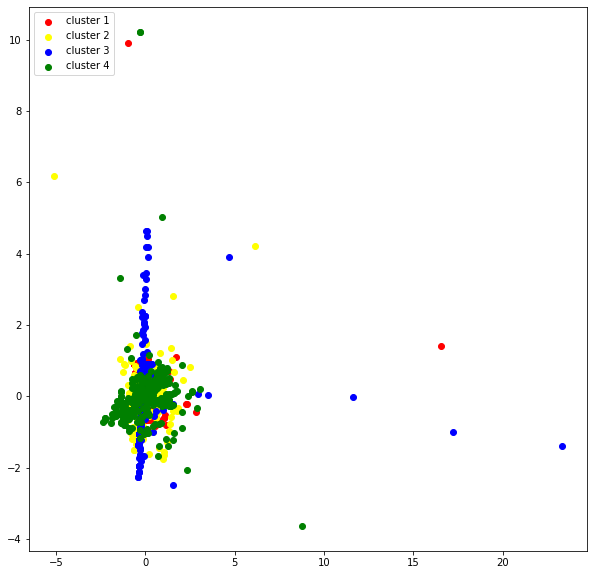

In [514]:
fig = plt.figure(figsize = (10,10))
plt.scatter(pc1[0],pc2[0], c ="red", label="cluster 1")
plt.scatter(pc1[1],pc2[1], c ="yellow", label="cluster 2")
plt.scatter(pc1[2],pc2[2], c ="blue", label="cluster 3")
plt.scatter(pc1[3],pc2[3], c ="green", label="cluster 4")
plt.legend(loc="upper left")
plt.show()

### Percentage accuracy of clustering 

In [515]:
#accuracy function
def accuracy(clust, no):
    count = 0
    size = len(clust)
    for c in clust:
        if c[-1] == no:
            count += 1
    return(count/size)*100

In [516]:
i = 0
acu = []
for x in cluster:
    acc = accuracy(cluster[i], i)
    acu.append(acc)
    i = i+1
print('The accuracy of clustering(Single-link) for the days: Thursday, Friday, Saturday and Sunday respectively are:')
for y in acu:
    print(y, '%')

The accuracy of clustering(Single-link) for the days: Thursday, Friday, Saturday and Sunday respectively are:
27.21518987341772 %
39.0625 %
28.316326530612244 %
22.570532915360502 %



## 2. Complete link HAC

In [517]:
#InitialiseEach element is a separate cluster
cluster = [] #list of all clusters
for x in dataset:
    x_ = np.array([x])
    cluster.append(x_)

k = cluster[0]
len(cluster)

997

In [518]:
#Clustering by HAC

while(len(cluster)>4): #continue until the no of clusters = 4
    x = cluster.pop(0) #delete the 1st element from the cluster list and store it in x 
    i = 0
    min_d = None      # to store the minimum distance between 2 clusters
    for y in cluster: #find the cluster whose distance from x is the least
        d = dmax(x,y) #complete link clustering

        if min_d is None:
            min_d = d
            ind = i  
        elif d<min_d:
            min_d = d
            ind = i   #get the index of the cluster closest to x
        i = i+1
    clus = cluster.pop(ind)#delete the closest cluster to x from the list and store in y
    f = np.vstack((x, clus)) #merge x and y to obtain 1 cluster
    cluster.append(f) #add the new cluster to the list


print('The number of clusters formed = ',len(cluster))

The number of clusters formed =  4


In [519]:
print(len(cluster[0]))
print(len(cluster[1]))
print(len(cluster[2]))
print(len(cluster[3]))

104
188
215
490


### Plotting the clusters

In [520]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [521]:
i = 0
pc1 = []
pc2 = []
while (i<4):
    cl = cluster[i]
    clus = StandardScaler().fit_transform(cl[:,:-1])#ignoring the days column
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(clus)
    pc11 = principalComponents[:, 0]
    pc1.append(pc11)
    pc12 = principalComponents[:, 1]
    pc2.append(pc12)
    
    i = i+1

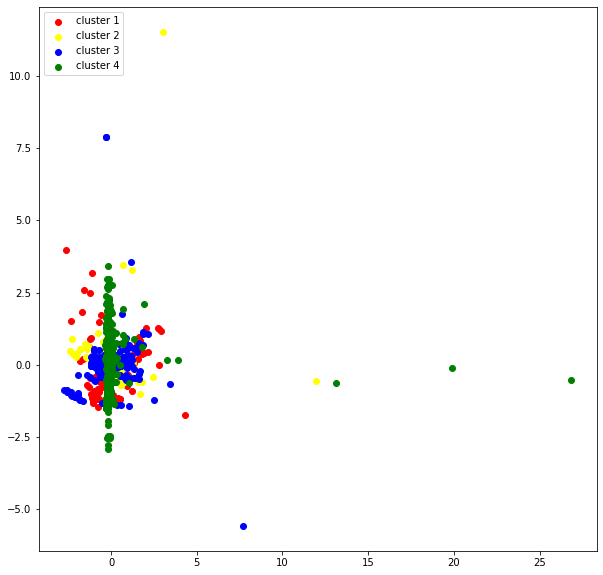

In [522]:
fig = plt.figure(figsize = (10,10))
plt.scatter(pc1[0],pc2[0], c ="red", label="cluster 1")
plt.scatter(pc1[1],pc2[1], c ="yellow", label="cluster 2")
plt.scatter(pc1[2],pc2[2], c ="blue", label="cluster 3")
plt.scatter(pc1[3],pc2[3], c ="green", label="cluster 4")
plt.legend(loc="upper left")
plt.show()

### Percentage accuracy of clustering 

In [523]:
count = [0, 0, 0, 0]
print(len(cluster[3]))
for x in cluster[3]:
    if x[-1]==0:
        count[0] = count[0] +1
    elif  x[-1]== 1:
        count[1] = count[1] +1
    elif x[-1]==2:
        count[2]+=1
    elif x[-1]==3:
        count[3]+=1
print(count)

490
[62, 210, 145, 73]


In [524]:
f_cluster = [0,0,0,0]
f_cluster[3] = cluster[index[0]] #cluster corresponding to 0 i.e thursday
f_cluster[1] = cluster[index[1]] #cluster corresponding to 1 i.e friday
f_cluster[2] = cluster[index[2]] #cluster corresponding to 2 i.e saturday
f_cluster[0] = cluster[index[3]] #cluster corresponding to 3 i.e sunday


#for x in f_cluster:
    #print(len(x))

In [525]:
i = 0
acu = []
for x in f_cluster:
    acc = accuracy(f_cluster[i], i)
    acu.append(acc)
    i = i+1
print('The accuracy of clustering(Complete-link) for the days: Thursday, Friday, Saturday and Sunday respectively are:')
for y in acu:
    print(y, '%')

The accuracy of clustering(Complete-link) for the days: Thursday, Friday, Saturday and Sunday respectively are:
12.653061224489795 %
44.680851063829785 %
46.97674418604651 %
44.230769230769226 %
